In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [6]:
df_path = '/content/output.csv'
df = pd.read_csv(df_path)


In [7]:
y = df['Label']
X = df.drop(columns=['Label'])


In [8]:
X['Budget'] = X['Budget'].str.replace('$', '').astype(float)
label_encoder = LabelEncoder()
X['Category'] = label_encoder.fit_transform(X['Category'])
columns_to_drop = ['Unnamed: 0', 'Project', 'Country','Start','End','profit (%)','Emissions decrease']
X = X.drop(columns=columns_to_drop)

<ipython-input-8-6fc45f65895e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X['Budget'] = X['Budget'].str.replace('$', '').astype(float)


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [11]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [12]:

y_val_pred = svm_model.predict(X_val)


In [13]:

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (SVM): {val_accuracy:.2f}")

Validation Accuracy (SVM): 0.81


In [21]:
df['Budget'] = df['Budget'].str.replace('$', '').astype(float)
df['FindingSource (%)'] = df['FindingSource (%)'].astype(float)
df['TRL Start'] = df['TRL Start'].astype(int)
df['TRL End'] = df['TRL End'].astype(int)

<ipython-input-21-bbc978da5aa1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Budget'] = df['Budget'].str.replace('$', '').astype(float)


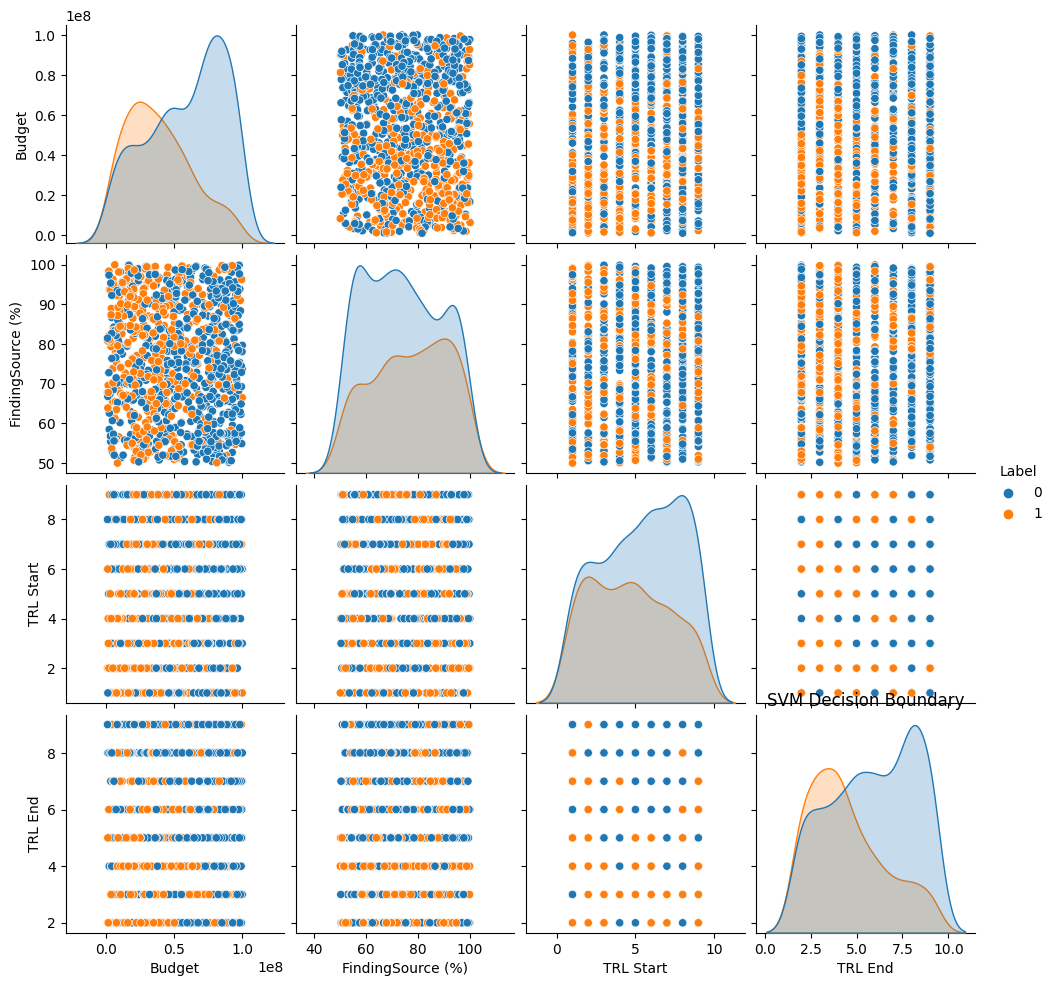

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df, hue='Label', vars=[ 'Budget' , 'FindingSource (%)','TRL Start','TRL End'])
plt.title("SVM Decision Boundary")
plt.show()